# Fast Food Marketing Campaign A\B Test

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

dataset: https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Three promotion methods were applied. To find out which one of them generates more sales we will apply ANOVA test and Tukey paired test.
For this we have to check if requirments are met.

In [11]:
data = pd.read_csv('WA_Marketing-Campaign.csv')
data.sample(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
452,9,Medium,807,1,2,1,46.02
70,2,Small,105,8,3,3,59.73
103,3,Large,207,1,3,4,94.21
295,6,Medium,509,8,1,4,47.50
330,7,Medium,603,4,2,3,41.44


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [106]:
data.groupby(by='Promotion').agg(['mean', 'std', 'count']).SalesInThousands

,mean,std,count
Promotion,,,
1,58.099012,16.553782,172
2,47.329415,15.108955,188
3,55.364468,16.766231,188


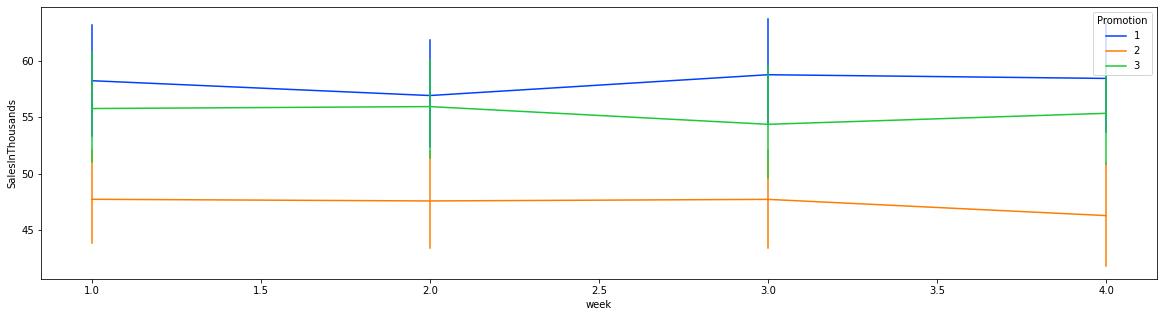

In [99]:
plt.subplots(figsize=(20,5))
sns.lineplot(x=data.week, y=data.SalesInThousands, hue=data.Promotion,err_style='bars' , palette='bright')
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1));

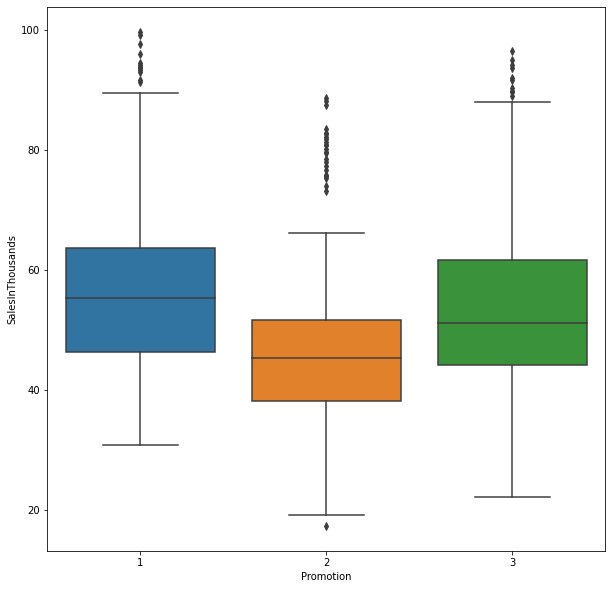

In [86]:
plt.figure(figsize=(10,10), label='Sales Boxplot by Type of Promotion')
sns.boxplot(y=data.SalesInThousands, x=data.Promotion);

#### Normality test. 
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [105]:
st.shapiro(data.SalesInThousands)

ShapiroResult(statistic=0.9346455335617065, pvalue=9.384886192286522e-15)

We can reject the null hypothesis, p-value < 0.5.

#### Homogenity test.
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

In [48]:
st.levene(data.SalesInThousands[data.Promotion==1], data.SalesInThousands[data.Promotion==2], data.SalesInThousands[data.Promotion==3])
# populations have similar variances

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

Samples have similar variences, p_value > 0.05.

#### ANOVA test
Test the null hypothesis that promotion method groups have the same population mean. 
One-way ANOVA can tolerate data that is non-normal (number of observations > 30). 

In [49]:
st.f_oneway(data.SalesInThousands[data.Promotion==1], data.SalesInThousands[data.Promotion==2], data.SalesInThousands[data.Promotion==3])

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

We can reject the null hypothesis, p_value < 0.5. At least one of the methods is significantly different.

#### Tukey test.
To find means that are significantly different from each oter

In [52]:
tukey = pairwise_tukeyhsd(endog=data.SalesInThousands, groups=data.Promotion, alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -10.7696  0.001 -14.774 -6.7652   True
     1      3  -2.7345 0.2447 -6.7389  1.2698  False
     2      3   8.0351  0.001  4.1207 11.9494   True
----------------------------------------------------


Both 1 and 3 promotion metgods are significantly different from 2 method, yet there is no significant difference between them.